In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


In [35]:
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)
outliers=np.array([10,110,5,120])
data=np.concatenate([data,outliers])
data

array([ 54.96714153,  48.61735699,  56.47688538,  65.23029856,
        47.65846625,  47.65863043,  65.79212816,  57.67434729,
        45.30525614,  55.42560044,  45.36582307,  45.34270246,
        52.41962272,  30.86719755,  32.75082167,  44.37712471,
        39.8716888 ,  53.14247333,  40.91975924,  35.87696299,
        64.65648769,  47.742237  ,  50.67528205,  35.75251814,
        44.55617275,  51.1092259 ,  38.49006423,  53.75698018,
        43.9936131 ,  47.0830625 ,  43.98293388,  68.52278185,
        49.86502775,  39.42289071,  58.22544912,  37.7915635 ,
        52.08863595,  30.40329876,  36.71813951,  51.96861236,
        57.3846658 ,  51.71368281,  48.84351718,  46.98896304,
        35.2147801 ,  42.80155792,  45.39361229,  60.57122226,
        53.4361829 ,  32.36959845,  53.24083969,  46.1491772 ,
        43.23078   ,  56.11676289,  60.30999522,  59.31280119,
        41.60782477,  46.90787624,  53.31263431,  59.75545127,
        45.20825762,  48.14341023,  38.93665026,  38.03

In [36]:
data.shape

(104,)

In [37]:
df=pd.DataFrame(data,columns=['values'])
df

,values
0,54.967142
1,48.617357
2,56.476885
3,65.230299
4,47.658466
...,...
99,47.654129
100,10.000000
101,110.000000
102,5.000000


<Axes: >

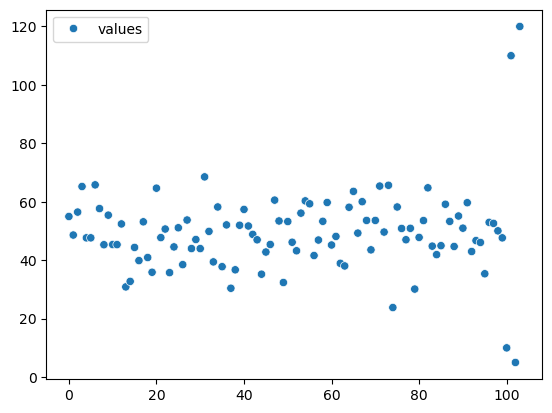

In [38]:
sns.scatterplot(df)

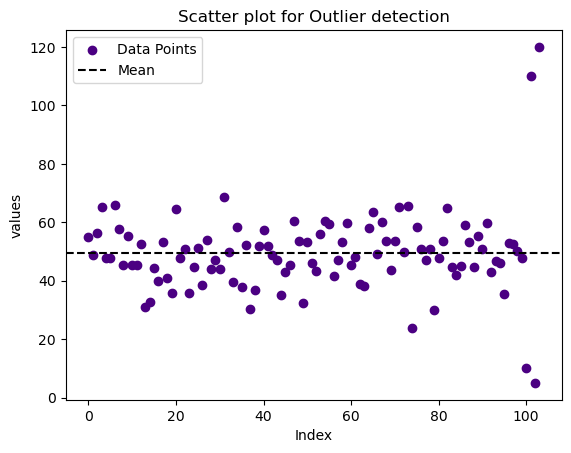

In [39]:
plt.scatter(range(len(df)),df['values'],color='indigo',label='Data Points')
plt.axhline(y=df['values'].mean(),color='black',linestyle='--',label='Mean')
plt.xlabel('Index')
plt.ylabel('values')
plt.title("Scatter plot for Outlier detection")
plt.legend()
plt.show()

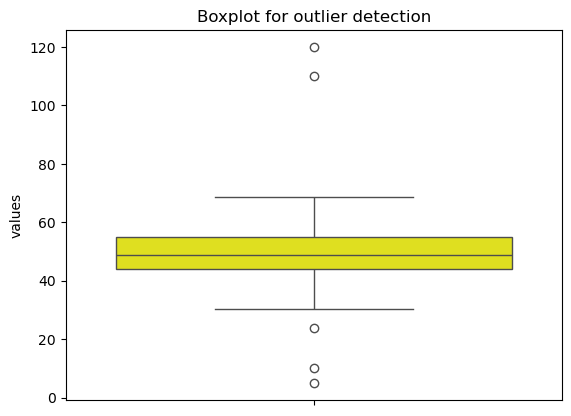

In [40]:
sns.boxplot(df,y='values',color='yellow')
plt.title("Boxplot for outlier detection")
plt.show()

In [43]:
df['z-score']=zscore(df['values'])
df['outlier_z']=df['z-score'].apply(lambda x: 'Outlier' if abs(x) >3 else 'Normal')
print(df[df['outlier_z']=='Outlier'])

     values   z-score outlier_z
101   110.0  4.328173   Outlier
102     5.0 -3.175368   Outlier
103   120.0  5.042796   Outlier


In [42]:
df

,values,z-score,outlier_z
0,54.967142,0.395399,Normal
1,48.617357,-0.058371,Normal
2,56.476885,0.503289,Normal
3,65.230299,1.128828,Normal
4,47.658466,-0.126896,Normal
...,...,...,...
99,47.654129,-0.127206,Normal
100,10.000000,-2.818056,Normal
101,110.000000,4.328173,Outlier
102,5.000000,-3.175368,Outlier


**Finding Outliers Using the IQR Method with a 5-Number Summary**

The 5-number summary consists of:
 
Minimum (Q0) → The smallest value in the dataset.
 
First Quartile (Q1) → The 25th percentile (lower quartile).
 
Median (Q2) → The 50th percentile (middle value).
 
Third Quartile (Q3) → The 75th percentile (upper quartile).
 
Maximum (Q4) → The largest value in the dataset.
 
The Interquartile Range (IQR) is calculated as:
 
IQR=Q3−Q1
 
Any value outside the range:
 
[Q1−1.5×IQR,Q3+1.5×IQR]  is considered an outlier.
 

The Interquartile Range (IQR) is calculated as:
 
IQR=Q3−Q1
 
Any value outside the range:
 
[Q1−1.5×IQR,Q3+1.5×IQR]  is considered an outlier.
 

In [ ]:
q1=df['values'].quantile(0.25)
q3=df['values'].quantile(0.75)
iqr=q3-q1

lb=q1-1.5*iqr
ub=q3+1.5*iqr
 

In [46]:
iqr


11.134123708600924

In [47]:
lb

27.17321545886533

In [48]:
ub

71.70971029326903

In [49]:
df[df['values']<lb]

,values,z-score,outlier_z
74,23.802549,-1.831694,Normal
100,10.000000,-2.818056,Normal
102,5.000000,-3.175368,Outlier


In [51]:
df[df['values']>ub]

,values,z-score,outlier_z
101,110.0,4.328173,Outlier
103,120.0,5.042796,Outlier


In [59]:
outliers=df[(df['values']<lb) | (df['values']>ub)]

outliers

,values,z-score,outlier_z
74,23.802549,-1.831694,Normal
100,10.000000,-2.818056,Normal
101,110.000000,4.328173,Outlier
102,5.000000,-3.175368,Outlier
103,120.000000,5.042796,Outlier


In [71]:
fd=pd.DataFrame({
    'age': [22,25,27,28,30,35,40,45,50,55,60,65,70],
    'income':[2000,2500,2700,3200,3500,3800,4000,4200,4300,4500,5000,5500,6000],
    'class':['h','l','l','h','h','l','h','h','l','l','h','h','l']
})
fd

,age,income,class
0,22,2000,h
1,25,2500,l
2,27,2700,l
3,28,3200,h
4,30,3500,h
5,35,3800,l
6,40,4000,h
7,45,4200,h
8,50,4300,l
9,55,4500,l


In [74]:
fd_high=fd[fd['class']=='h']
fd_low=fd[fd['class']=='l']
fd_high,fd_low


(    age  income class
 0    22    2000     h
 3    28    3200     h
 4    30    3500     h
 6    40    4000     h
 7    45    4200     h
 10   60    5000     h
 11   65    5500     h,
     age  income class
 1    25    2500     l
 2    27    2700     l
 5    35    3800     l
 8    50    4300     l
 9    55    4500     l
 12   70    6000     l)

In [79]:
from sklearn.utils import resample
fd_high_downsampled=resample(fd_high,replace=False,n_samples=len(fd_low),random_state=42)
fd_balanced=pd.concat([fd_high_downsampled,fd_low])

In [80]:
print(fd_balanced['class'].value_counts())

class
h    6
l    6
Name: count, dtype: int64


In [81]:
fd_balanced

,age,income,class
0,22,2000,h
3,28,3200,h
10,60,5000,h
4,30,3500,h
7,45,4200,h
6,40,4000,h
1,25,2500,l
2,27,2700,l
5,35,3800,l
8,50,4300,l


In [82]:
fd_high

,age,income,class
0,22,2000,h
3,28,3200,h
4,30,3500,h
6,40,4000,h
7,45,4200,h
10,60,5000,h
11,65,5500,h


In [83]:
fd['class']

0     h
1     l
2     l
3     h
4     h
5     l
6     h
7     h
8     l
9     l
10    h
11    h
12    l
Name: class, dtype: object

In [84]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


1.SMOTE TO GENERATE  SYNTHETIC  SAMPLES INSTEAD OF DUPLICATING EXISTING ONES.
2.Convert categorical class labels to numeric  form  for SMOTE to Work 


In [87]:
np.random.seed(42)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso                                                                                          